In [115]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from nxcals.api.extraction.data.builders import *
from scipy.optimize import curve_fit
from datetime import datetime
from madxtools.plot_tool import *
from madxtools.transfer_function import *
def my_mpl_style():
    '''Sets my preferred style options for matplotlib.'''
    import matplotlib as mpl
    # Font sizes
    mpl.rcParams['axes.labelsize'] = 18
    mpl.rcParams['legend.fontsize'] = 18
    mpl.rcParams['axes.titlesize'] = 20  # Change the number for your preferred fontsize
    mpl.rcParams['xtick.labelsize'] = 16
    mpl.rcParams['ytick.labelsize'] = 16
    mpl.rcParams['axes.formatter.limits'] = (-2, 3)
my_mpl_style()

In [43]:
start = "2023-08-29 15:34:00.000"
end = "2023-08-29 15:52:00.000"

selector = "CPS.USER.EAST4"

In [87]:
df_xsec23 = DevicePropertyDataQuery.builder(spark).system("CMW").startTime(start).endTime(end).entity().parameter("F61.XSEC023-I1/SpillData").build()
df_xsec23 = df_xsec23.filter(df_xsec23.selector.isin(selector)).toPandas()
df_xsec23['intensity'] = df_xsec23['semSpillData'].apply(lambda x: abs(x['elements'].sum()))

df_xsec23["timestamp"] = pd.to_datetime(df_xsec23['acqStamp'], unit='ns')
df_xsec23.sort_values(by="timestamp", inplace=True)
df_xsec23 = df_xsec23[df_xsec23.selector == selector].reset_index(drop=True)

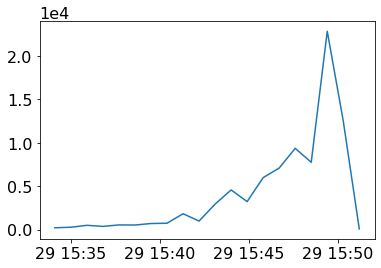

In [88]:
plt.plot(df_xsec23.timestamp, df_xsec23.intensity)

In [89]:
start = "2023-08-29 15:34:00.000"
end = "2023-08-29 15:52:00.000"

selector = "CPS.USER.EAST4"

In [90]:
df_gain = DevicePropertyDataQuery.builder(spark).system("CMW").startTime(start).endTime(end).entity().parameter("PR.BQL72/SummaryAcquisition").build().toPandas()
df_gain["timestamp"] = pd.to_datetime(df_gain['acqStamp'], unit='ns')
df_gain.sort_values(by="timestamp", inplace=True)
df_gain = df_gain[df_gain.selector == selector].reset_index(drop=True)

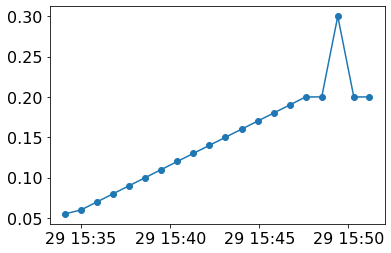

In [92]:
plt.plot(df_gain.timestamp, df_gain.exAmplitudeH, marker="o")

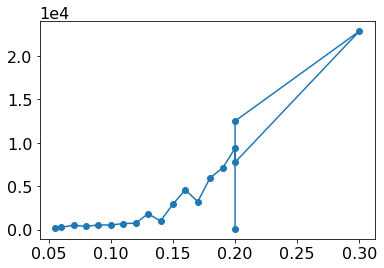

In [97]:
fig, ax = plt.subplots()

ax.plot(df_gain.exAmplitudeH, df_xsec23.intensity, marker="o")

In [106]:
d = {'gain': df_gain.exAmplitudeH, 'intensity': df_xsec23.intensity}
df = pd.DataFrame(data=d)
df.sort_values(by="gain", inplace=True)
df.drop(df.index[18], inplace=True)

In [107]:
df.sort_values(by="gain", inplace=True)

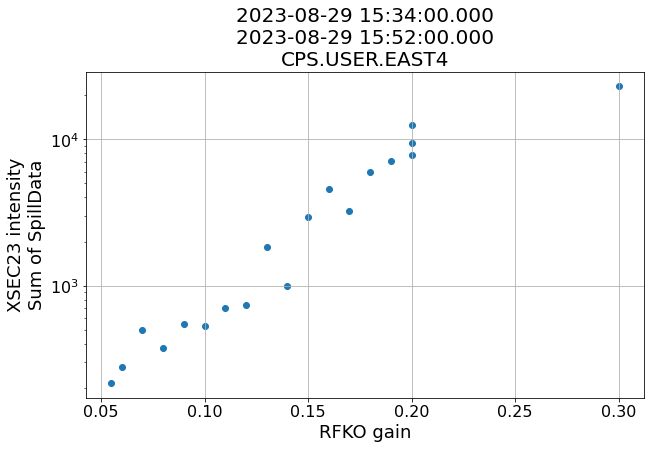

In [119]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df.gain, df.intensity, marker="o")
ax.set_yscale("log")
ax.set_xlabel("RFKO gain")
ax.set_ylabel("XSEC23 intensity\nSum of SpillData")
ax.set_title(start+"\n"+end+"\n"+selector)
ax.grid()